# Introduccion Landsat

El programa Landsat es una serie de misiones de observación de la Tierra por satélite administrado conjuntamente por la NASA y el Servicio Geológico de EE.UU. 

En 1972, el lanzamiento de *ERTS-1* (Tierra Recursos Tecnología por Satélite, más tarde renombrado Landsat 1) comenzó la era de la una serie de satélites que tienen desde que adquirida forma continua de tierras datos obtenidos por detección remota basados en el espacio.

El último satélite de la serie es Landsat 8, la Misión de Continuidad de Datos de Landsat (LDCM), se puso en marcha el 11 de febrero de 2013, los datos adquiridos por el satélite continúan para expandir el archive para los usuarios de en todo el mundo.

## Serie de satélites Landsat y año de su lanzamiento:
- Landsat 1: 23/07/1972 – 06/01/1978
- Landsat 2: 22/01/1975 – 25/01/1982
- Landsat 3: 05/03/1978 – 31/03/1983
- Landsat 4: 16/06/1982 – 14/12/1993
- Landsat 5: 07/03/1984 – 05/06/2013
- Landsat 6: 03/10/1993 - Lanzamiento fallido.
- Landsat 7: 1999 – 2003 OF SLC - actualidad
- Landsat 8: 2013 – actualidad
- Landsat 9: 2021 - actualidad

## Satélite LandSat-8 y 9 – OLI  y TIRS

Este satélite contiene dos sensores: Sensor operacional de imágenes de tierra (OLI) y un Sensor Infrarojos Térmico (TIRS).
OLI está formado por 9 bandas espectrales que van desde lo visible pasando por los infrarojos hasta el espectro de radiación de bajas ondas. Con las imágenes de resolución espacial, que oscilan entre los 15 y los 30m.


#### Cuadro 4.	Característica imagen Landsat 8 y 9

LANDSAT 8 y 9  | Sensor  |Longitud de onda (µm)| Resolución Espacial (m) |Resolución Radiométrica 
----------------- | --------|---------------------|-------------------------|-----------------------
1 - Ultra azul (costero/aerosol)  | OLI |0.43 - 0.45|30|16 bits
2 - Azul  | OLI |0.45 - 0.51|30|16 bits
3 - Verde  | OLI | 0.53 - 0.59|30|16 bits
4 - Rojo|OLI | 0.64 - 0.67|30|16 bits
5 - Infrarrojo Cercano (NIR)|OLI |0.85 - 0.88|30|16 bits
6 - Onda corta infrarroja (SWIR1)  | OLI |1.57 - 1.65|30|16 bits
7 - Onda corta infrarroja (SWIR2)| OLI | 2.11 - 2.29|30|16 bits
8 - Pancromática  | OLI | 0.52 - 0.90|15|16 bits
9 - Cirrus |OLI | 1.36 - 1.38|30|16 bits
10 - Infrarrojo térmico 1 | TIRS | 10.60 - 11.19|100*(30)|16 bits
11 - Infrarrojo térmico 2 | TIRS | 11.50 - 12.51|100*(30)|16 bits

## Conversión del factor a reflectancia de Superficie

Fuente: https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC09_C02_T1_L2

Fuente: https://d9-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/media/files/LSDS-1619_Landsat-8-9-C2-L2-ScienceProductGuide-v4.pdf

Banda1_RS = B1*(0.0000275) + (-0.2)

Banda10_TB = ST_B*(0.00341802) + (149.0)

## Proceso automatico RS y TB Landsat 9 Colección 2 level 2

### Seleccion del directorio y archivo Landsat 

In [1]:
import os

In [2]:
# Consultar el directorio que esta trabajando
os.getcwd()

'C:\\Users\\GEOMATICA\\Agricultura_Python\\Script'

In [3]:
# Cambiar directorio
os.chdir(r"E:\Python\Agricultura_Python\Datos")

In [4]:
import glob

In [5]:
lista_tar = glob.glob("*.tar")
lista_tar

['LC09_L2SP_006066_20220626_20220802_02_T1.tar']

In [6]:
# Crear un nombre segun el archivo ingresado
out_dir = os.getcwd() + "\\" + lista_tar[0][0:25]
out_dir

'E:\\Python\\Agricultura_Python\\Datos\\LC09_L2SP_006066_20220626'

In [7]:
# Crear una carpeta con el nombre archivo ingresado
os.makedirs(out_dir, exist_ok = True)

In [8]:
import shutil

In [9]:
# Descomprimir archivo zip en el directorio creado
shutil.unpack_archive(lista_tar[0], extract_dir = out_dir)

### Seleccionar imagenes procesamiento

In [10]:
# Lista de archivo tif descomprimido
lista_tif = glob.glob(pathname=out_dir + "\\"+"*[1-7].tif")
lista_tif

['E:\\Python\\Agricultura_Python\\Datos\\LC09_L2SP_006066_20220626\\LC09_L2SP_006066_20220626_20220802_02_T1_SR_B1.TIF',
 'E:\\Python\\Agricultura_Python\\Datos\\LC09_L2SP_006066_20220626\\LC09_L2SP_006066_20220626_20220802_02_T1_SR_B2.TIF',
 'E:\\Python\\Agricultura_Python\\Datos\\LC09_L2SP_006066_20220626\\LC09_L2SP_006066_20220626_20220802_02_T1_SR_B3.TIF',
 'E:\\Python\\Agricultura_Python\\Datos\\LC09_L2SP_006066_20220626\\LC09_L2SP_006066_20220626_20220802_02_T1_SR_B4.TIF',
 'E:\\Python\\Agricultura_Python\\Datos\\LC09_L2SP_006066_20220626\\LC09_L2SP_006066_20220626_20220802_02_T1_SR_B5.TIF',
 'E:\\Python\\Agricultura_Python\\Datos\\LC09_L2SP_006066_20220626\\LC09_L2SP_006066_20220626_20220802_02_T1_SR_B6.TIF',
 'E:\\Python\\Agricultura_Python\\Datos\\LC09_L2SP_006066_20220626\\LC09_L2SP_006066_20220626_20220802_02_T1_SR_B7.TIF']

In [20]:
#!pip install rasterio

In [11]:
import rasterio

In [12]:
# Agregar los raster mediante rasterio
R_B1 = rasterio.open(lista_tif[0])
R_B2 = rasterio.open(lista_tif[1])
R_B3 = rasterio.open(lista_tif[2])
R_B4 = rasterio.open(lista_tif[3])
R_B5 = rasterio.open(lista_tif[4])
R_B6 = rasterio.open(lista_tif[5])
R_B7 = rasterio.open(lista_tif[6])

In [13]:
# Caracteristica de la banda mediante Rasterio
print("Numero de bandas:", R_B4.count)
print("Numero de Columnas:", R_B4.width)
print("Numero de Filas:", R_B4.height)
print("Tipo de archivo bits:", R_B4.dtypes[0])
print("Parametro de transformacion:", R_B4.transform)
print("Resolucion espacial:", R_B4.transform[0], "m")
print("Extension banda:", R_B4.bounds)

Numero de bandas: 1
Numero de Columnas: 7621
Numero de Filas: 7751
Tipo de archivo bits: uint16
Parametro de transformacion: | 30.00, 0.00, 472185.00|
| 0.00,-30.00,-843285.00|
| 0.00, 0.00, 1.00|
Resolucion espacial: 30.0 m
Extension banda: BoundingBox(left=472185.0, bottom=-1075815.0, right=700815.0, top=-843285.0)


In [14]:
lista_coor = list(R_B4.bounds)
lista_coor

[472185.0, -1075815.0, 700815.0, -843285.0]

In [15]:
border = [(lista_coor[0], lista_coor[3]), 
          (lista_coor[0], lista_coor[1]), 
          (lista_coor[2], lista_coor[1]), 
          (lista_coor[2], lista_coor[3])]
border

[(472185.0, -843285.0),
 (472185.0, -1075815.0),
 (700815.0, -1075815.0),
 (700815.0, -843285.0)]

In [18]:
#!pip install geopandas

In [19]:
# Importar shapely
from shapely.geometry import Polygon

In [20]:
# Crear poligono mediante shapely de una lista
Poligono_geo = Polygon(shell=border)

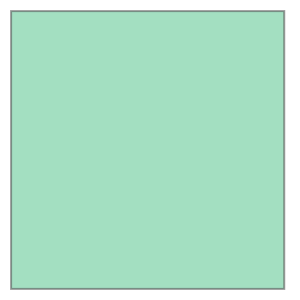

In [21]:
Poligono_geo

In [23]:
import geopandas as gpd

In [24]:
newdata = gpd.GeoDataFrame()

In [25]:
# crear una geometria dentro geodataframe
newdata["geometry"] = None

In [26]:
# Insertar el poligono en la geometria columna 0
newdata.at[0, "geometry"] = Poligono_geo

In [27]:
newdata.crs

In [28]:
newdata = gpd.GeoDataFrame.set_crs(newdata, crs=32618)

In [31]:
#!pip install folium

In [32]:
import folium

In [33]:
# agregar base mapa en folium
basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Esri Satellite': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
    )
}

In [34]:
# Reproject the data
data_geo = newdata.to_crs(epsg=4326)

In [35]:
longitud = data_geo.centroid.x
latitud = data_geo.centroid.y

C:\Users\GEOMATICA\AppData\Local\Temp\ipykernel_16324\3109106700.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  longitud = data_geo.centroid.x
C:\Users\GEOMATICA\AppData\Local\Temp\ipykernel_16324\3109106700.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  latitud = data_geo.centroid.y


In [36]:
latitud

0   -8.679407
dtype: float64

In [37]:
geopath = data_geo.geometry.to_json()

In [38]:
poligon = folium.features.GeoJson(geopath)

## Ruta a exportar shapefile

In [39]:
import os

In [40]:
os.getcwd()

'E:\\Python\\Agricultura_Python\\Datos'

In [41]:
ruta_archivos = r"E:\Python\Agricultura_Python\Datos"
os.chdir(ruta_archivos) # Cambiar ruta trabajo
os.getcwd() # Consultar ruta trabajo

'E:\\Python\\Agricultura_Python\\Datos'

In [43]:
# Determine the output path for the Shapefile
outfp = "Poligono_creado_GEO.shp"

# Exportar el dato shapefile
data_geo.to_file(outfp)

In [44]:
# Add custom basemaps
my_map = folium.Map(location=[latitud,longitud],
                    zoom_start=7, 
                    control_scale=True)
basemaps['Google Satellite'].add_to(my_map)
poligon.add_to(my_map)
my_map

In [45]:
# Convierte array
B1 = R_B1.read(1).astype('float64')
B2 = R_B2.read(1).astype('float64')
B3 = R_B3.read(1).astype('float64')
B4 = R_B4.read(1).astype('float64')
B5 = R_B5.read(1).astype('float64')
B6 = R_B6.read(1).astype('float64')
B7 = R_B7.read(1).astype('float64')

In [46]:
import copy
import numpy as np

In [47]:
print("Valor minimo banda:", np.nanmin(B4))
print("Valor maximo banda:", np.nanmax(B4))
print("Valor promedio banda:", np.round(np.nanmean(B4),3))
print("Valor desviasion estandar banda:", np.round(np.nanstd(B4),3))
print("Valor varianza banda:", np.round(np.nanvar(B4),3))

Valor minimo banda: 0.0
Valor maximo banda: 49578.0
Valor promedio banda: 5679.202
Valor desviasion estandar banda: 3952.051
Valor varianza banda: 15618706.797


In [48]:
# Realizar una clasificacion eliminar valor nulo "cero" Bandas 30m
B1_copy = copy.copy(B1) # 
B1_copy[B1 >= 1] = 1
B1_copy[B1 < 1] = np.nan

B2_copy = copy.copy(B2) # 
B2_copy[B2 >= 1] = 1
B2_copy[B2 < 1] = np.nan

B3_copy = copy.copy(B3) # 
B3_copy[B3 >= 1] = 1
B3_copy[B3 < 1] = np.nan

B4_copy = copy.copy(B4) # 
B4_copy[B4 >= 1] = 1
B4_copy[B4 < 1] = np.nan

B5_copy = copy.copy(B5) # 
B5_copy[B5 >= 1] = 1
B5_copy[B5 < 1] = np.nan

B6_copy = copy.copy(B6) # 
B6_copy[B6 >= 1] = 1
B6_copy[B6 < 1] = np.nan

B7_copy = copy.copy(B7) # 
B7_copy[B7 >= 1] = 1
B7_copy[B7 < 1] = np.nan

In [49]:
# Devuelve los valores ND sin valor cero
B1 = B1_copy*B1
B2 = B2_copy*B2
B3 = B3_copy*B3
B4 = B4_copy*B4
B5 = B5_copy*B5
B6 = B6_copy*B6
B7 = B7_copy*B7
B7

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [54]:
#!pip install matplotlib

In [55]:
import matplotlib

In [56]:
from rasterio.plot import show

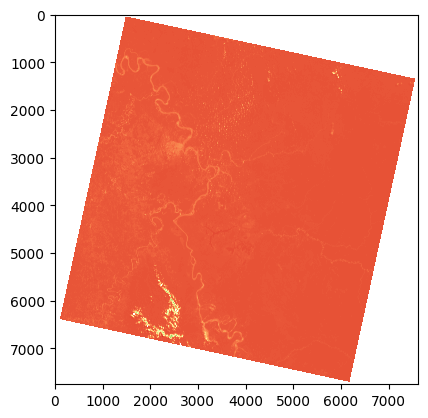

<AxesSubplot: >

In [57]:
# Plot band 1
show(B4,cmap="RdYlGn")  # jet, Spectral, viridis, RdYlGn

In [58]:
# Crear una funcion Scala Percentil
def Percentil(bandas):
    bandas_2 = np.nanpercentile(bandas,2)
    bandas_98 = np.nanpercentile(bandas,98)
    return ((bandas - bandas_2)/(bandas_98 - bandas_2))

In [59]:
# utilizar la funcion Percentil
B6_NDC = Percentil(B6)
B5_NDC = Percentil(B5)
B4_NDC = Percentil(B4)

In [60]:
# Apilamos las bandas
RGBC = np.dstack((B6_NDC,B5_NDC,B4_NDC))

In [61]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


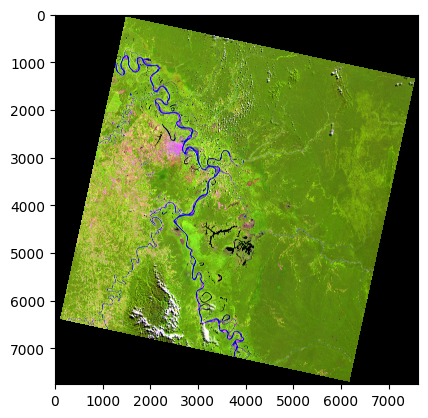

In [62]:
plt.imshow(RGBC)

In [63]:
# Factor escala
B1_RS = B1*(0.0000275) + (-0.2)
B2_RS = B2*(0.0000275) + (-0.2)
B3_RS = B3*(0.0000275) + (-0.2)
B4_RS = B4*(0.0000275) + (-0.2)
B5_RS = B5*(0.0000275) + (-0.2)
B6_RS = B6*(0.0000275) + (-0.2)
B7_RS = B7*(0.0000275) + (-0.2)

In [64]:
print("Valor minimo banda:", np.nanmin(B4_RS))
print("Valor maximo banda:", np.nanmax(B4_RS))
print("Valor promedio banda:", np.round(np.nanmean(B4_RS),3))
print("Valor desviasion estandar banda:", np.round(np.nanstd(B4_RS),3))
print("Valor varianza banda:", np.round(np.nanvar(B4_RS),3))

Valor minimo banda: -0.19912000000000002
Valor maximo banda: 1.1633950000000002
Valor promedio banda: 0.027
Valor desviasion estandar banda: 0.035
Valor varianza banda: 0.001


In [65]:
# Composicion de bandas
L9_RS_B1234567 = [B1_RS, B2_RS, B3_RS, B4_RS, B5_RS, B6_RS,B7_RS]

In [66]:
paramB1 = R_B1.meta
paramB1

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 7621,
 'height': 7751,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(30.0, 0.0, 472185.0,
        0.0, -30.0, -843285.0)}

In [67]:
# Actualizamos parametro RS B1234567
paramRS = R_B1.meta
paramRS.update(dtype = "float64",
               count = len(L9_RS_B1234567))
paramRS

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': 0.0,
 'width': 7621,
 'height': 7751,
 'count': 7,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(30.0, 0.0, 472185.0,
        0.0, -30.0, -843285.0)}

In [68]:
# Crear nombre de salida
name_RS = out_dir +"\\"+ lista_tar[0][0:25] + "_RS_B1234567.tif"
name_RS

'E:\\Python\\Agricultura_Python\\Datos\\LC09_L2SP_006066_20220626\\LC09_L2SP_006066_20220626_RS_B1234567.tif'

In [69]:
# Exportamos una imagen compuesta
with rasterio.open(name_RS, 'w', **paramRS) as dst:
    for num, name in enumerate(L9_RS_B1234567, start=1):
        dst.write_band(num, name)